In [166]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

# load the digits data set
digits = datasets.load_digits()
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [167]:
# print out the number of examples in the data set
print (len(digits.data))

1797


In [168]:
# print the target vector
print(digits.target)

[0 1 2 ... 8 9 8]


In [169]:
# print zero (0) as 8x8 image
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


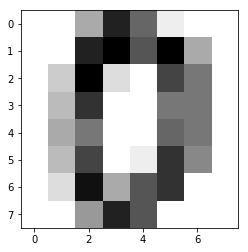

In [170]:
# visualize the zero (0) as an actual image
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [171]:
# specify SVM classifier
clf = svm.SVC(gamma=0.001, C=100)

In [172]:
# We load all but the last 10 to be the training set
X,y = digits.data[:-10], digits.target[:-10]
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
# predictions of the digits not used in the classifier
print('Prediction:', clf.predict(digits.data[-10:]))

Prediction: [5 4 8 8 4 9 0 8 9 8]


In [174]:
# visualize the prediction as an actual image
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation="nearest")
plt.show()

In [175]:
X_train = digits.data[:-10]
y_train = digits.target[:-10]

clf.fit(X_train,y_train)

# StratifiedKFold
import numpy as np
from sklearn.model_selection import StratifiedKFold

x = np.arange(2,11,1)
average = []

for numFold in x:
    scores = []
    kfold = StratifiedKFold(n_splits=numFold,
                       random_state=1).split(X_train,y_train)
    for k, (train, test) in enumerate (kfold):
        clf.fit(X_train[train],y_train[train])
        score = clf.score(X_train[test],y_train[test])
        scores.append(score)
    average.append(np.mean(scores))
    print('Fold: ', numFold, ', Accuracy: ', np.mean(score))

Fold:  2 , Accuracy:  0.9651685393258427
Fold:  3 , Accuracy:  0.9746621621621622
Fold:  4 , Accuracy:  0.9683257918552036
Fold:  5 , Accuracy:  0.9631728045325779
Fold:  6 , Accuracy:  0.9488054607508533
Fold:  7 , Accuracy:  0.9442231075697212
Fold:  8 , Accuracy:  0.9406392694063926
Fold:  9 , Accuracy:  0.9378238341968912
Fold:  10 , Accuracy:  0.9655172413793104


In [176]:
# Graph the accuracy of prediction
plt.plot(x, average)
plt.xlabel("Number of Folds")
plt.ylabel("Average Prediction Accuracy")
plt.title("Number of Folds v.s. Average Prediction Accuracy")

Text(0.5, 1.0, 'Number of Folds v.s. Average Prediction Accuracy')